In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\Dell\AppData\Local\Temp\ipykernel_17308\3005925559.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Loading Datasets and Cleaning Data

In [2]:
import pandas as pd
# Read the supply chain dataset into a DataFrame
# Use 'latin-1' encoding as it might be necessary for certain characters
supply_chain_df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1')
# Read the tokenized access logs into a DataFrame
access_logs_df = pd.read_csv('tokenized_access_logs.csv')


In [3]:
supply_chain_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
access_logs_df.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [5]:
supply_chain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
access_logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [7]:
supply_chain_df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [9]:
access_logs_df.isnull().sum()

Product       0
Category      0
Date          0
Month         0
Hour          0
Department    0
ip            0
url           0
dtype: int64

In [10]:
# Drop the 'Order Zipcode' and 'Product Description' columns from the supply chain DataFrame
supply_chain_df.drop(['Order Zipcode', 'Product Description'], axis=1, inplace=True)

In [12]:
supply_chain_df = supply_chain_df.dropna(subset=['Customer Zipcode'])

In [13]:
# Combine 'Customer Fname' and 'Customer Lname' columns into a new 'Customer Full Name' column
supply_chain_df['Customer Full Name'] = supply_chain_df['Customer Fname'] + ' ' + supply_chain_df['Customer Lname']
supply_chain_df.drop(['Customer Fname', 'Customer Lname'], axis=1, inplace=True)

In [14]:
supply_chain_df.shape

(180516, 50)

# Initial Data Exploration 

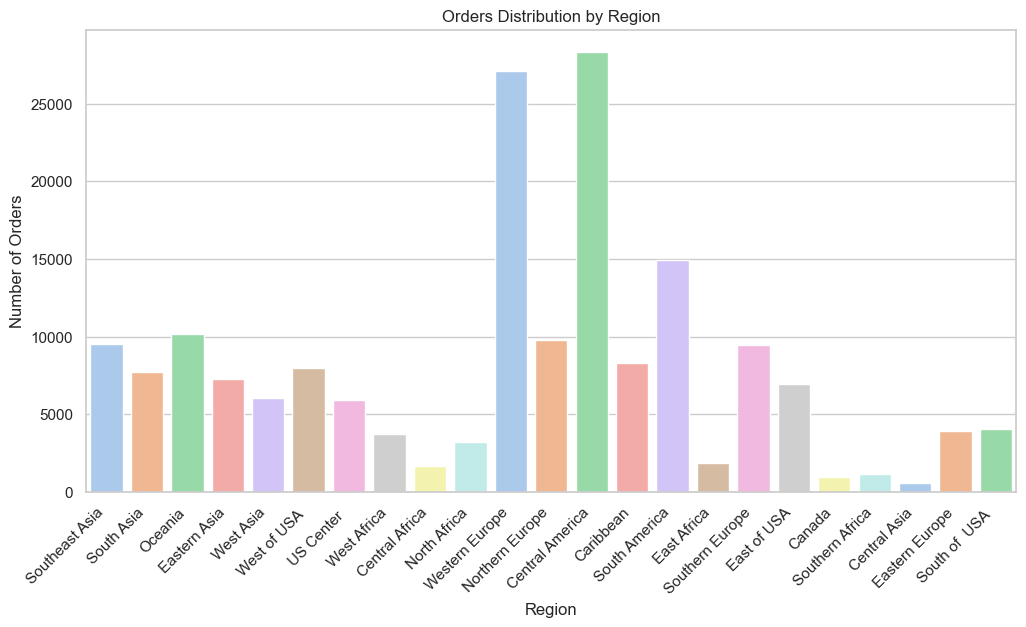

In [15]:
# Visualize orders distribution by region
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='Order Region', data=supply_chain_df, palette='pastel')
plt.title('Orders Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

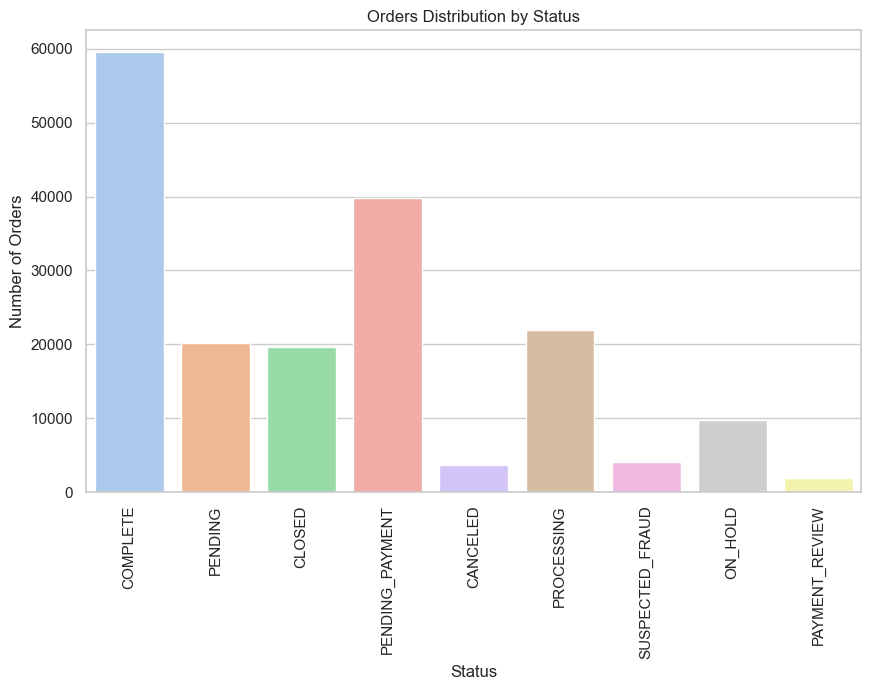

In [16]:
# Visualize distribution of orders by status
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Status', data=supply_chain_df, palette='pastel')
plt.title('Orders Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='center')
plt.show()


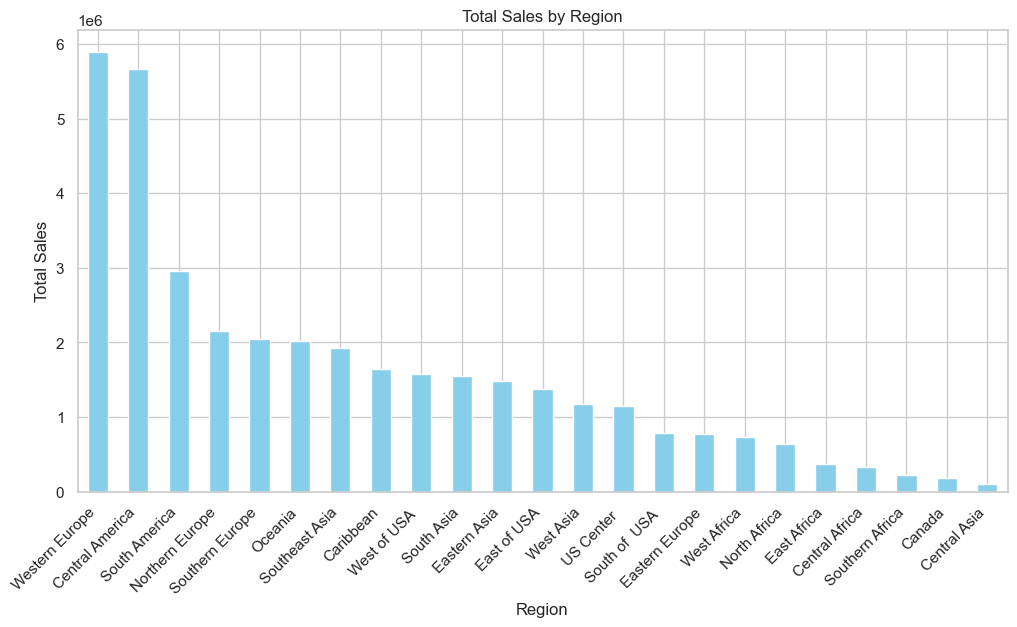

In [17]:
# Visualize total sales by region
region_sales = supply_chain_df.groupby('Order Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


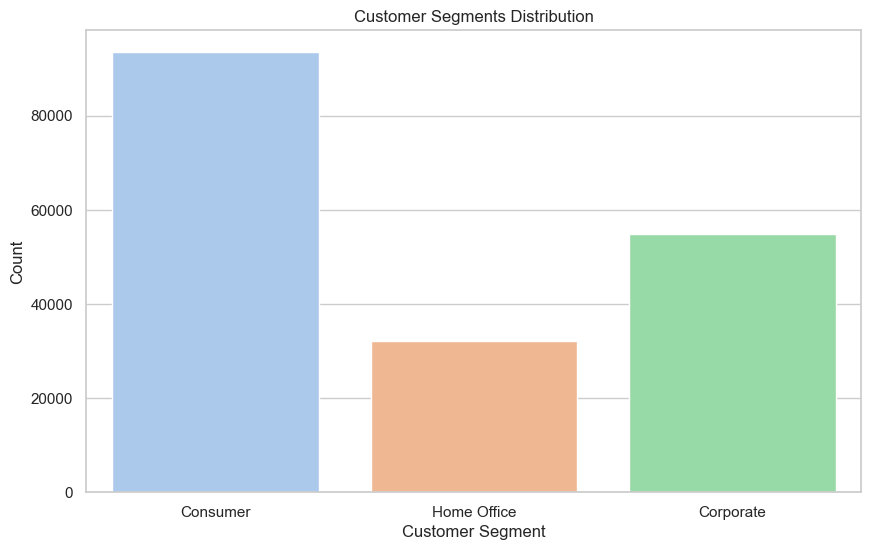

In [18]:
# Visualize distribution of customer segments
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Segment', data=supply_chain_df, palette='pastel')
plt.title('Customer Segments Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

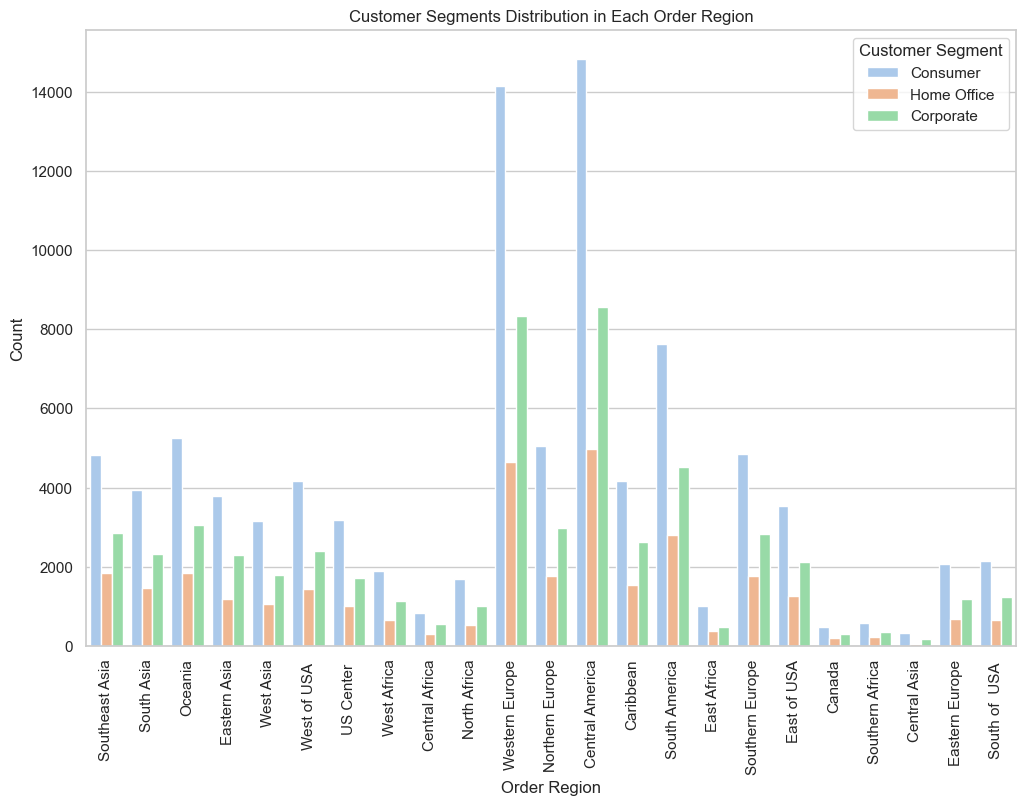

In [19]:
# Visualize distribution of customer segments in each order region
plt.figure(figsize=(12, 8))
sns.countplot(x='Order Region', hue='Customer Segment', data=supply_chain_df, palette='pastel')
plt.title('Customer Segments Distribution in Each Order Region')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.legend(title='Customer Segment')
plt.xticks(rotation=90)
plt.show()

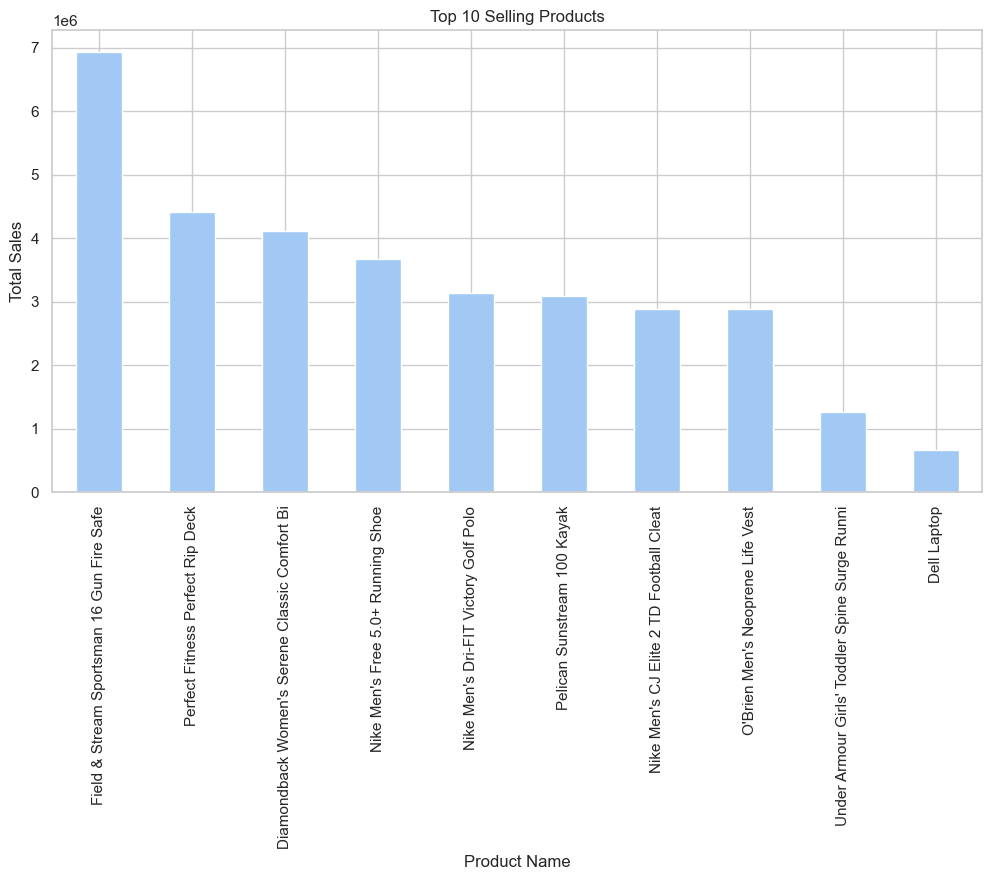

In [20]:
# Visualize top 10 selling products by total sales
sns.set_palette("pastel")
top_products = supply_chain_df.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', rot=90, ylabel='Total Sales', xlabel='Product Name', title='Top 10 Selling Products')
plt.show()

# Bivariate Analysis

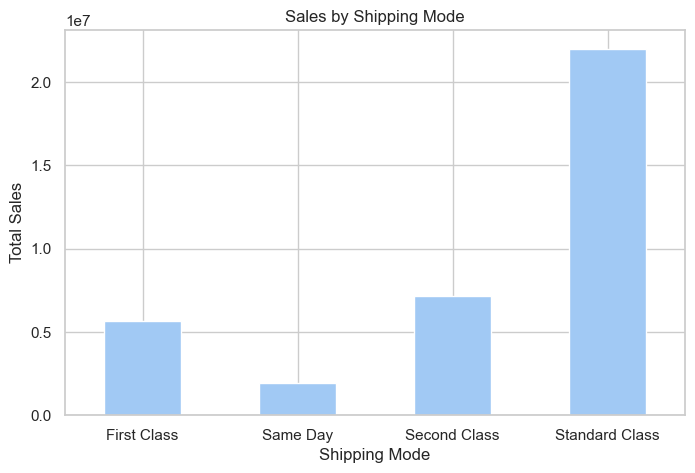

In [21]:
# Visualize total sales by shipping mode
sns.set_palette("pastel")
shipping_mode_sales = supply_chain_df.groupby('Shipping Mode')['Sales'].sum()
plt.figure(figsize=(8, 5))
shipping_mode_sales.plot(kind='bar', rot=0, ylabel='Total Sales', xlabel='Shipping Mode', title='Sales by Shipping Mode')
plt.show()

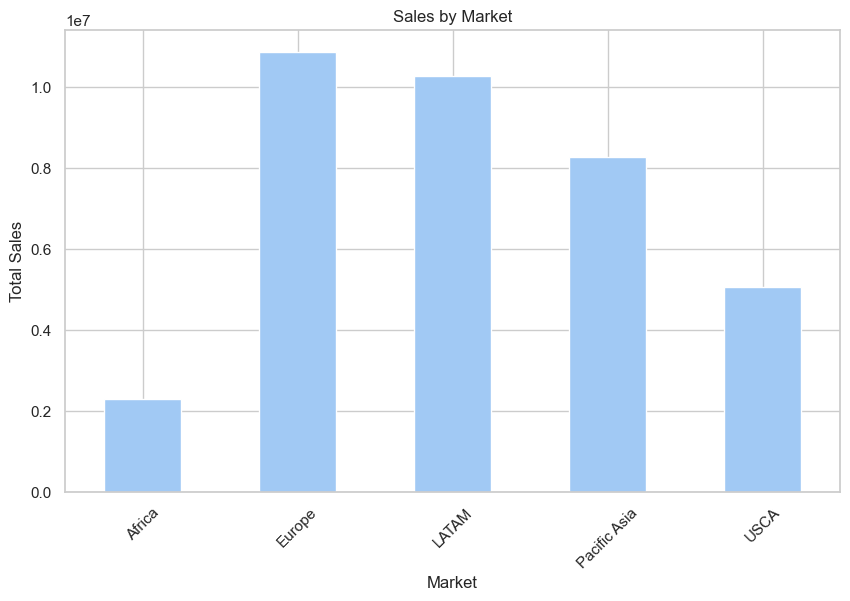

In [22]:
# Visualize total sales by market
sns.set_palette("pastel")
market_sales = supply_chain_df.groupby('Market')['Sales'].sum()
plt.figure(figsize=(10, 6))
market_sales.plot(kind='bar', rot=45, ylabel='Total Sales', xlabel='Market', title='Sales by Market')
plt.show()

<Figure size 1200x800 with 0 Axes>

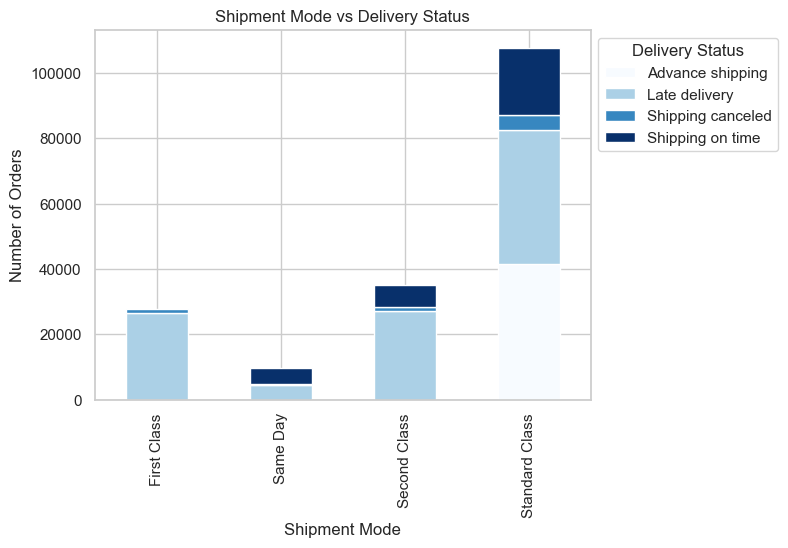

In [23]:
# Stacked bar plot displays the distribution of delivery statuses for each shipment mode
df_shipment_delivery = supply_chain_df.groupby(['Shipping Mode', 'Delivery Status']).size().unstack()
plt.figure(figsize=(12, 8))
df_shipment_delivery.plot(kind='bar', stacked=True, cmap='Blues')
plt.title('Shipment Mode vs Delivery Status')
plt.xlabel('Shipment Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

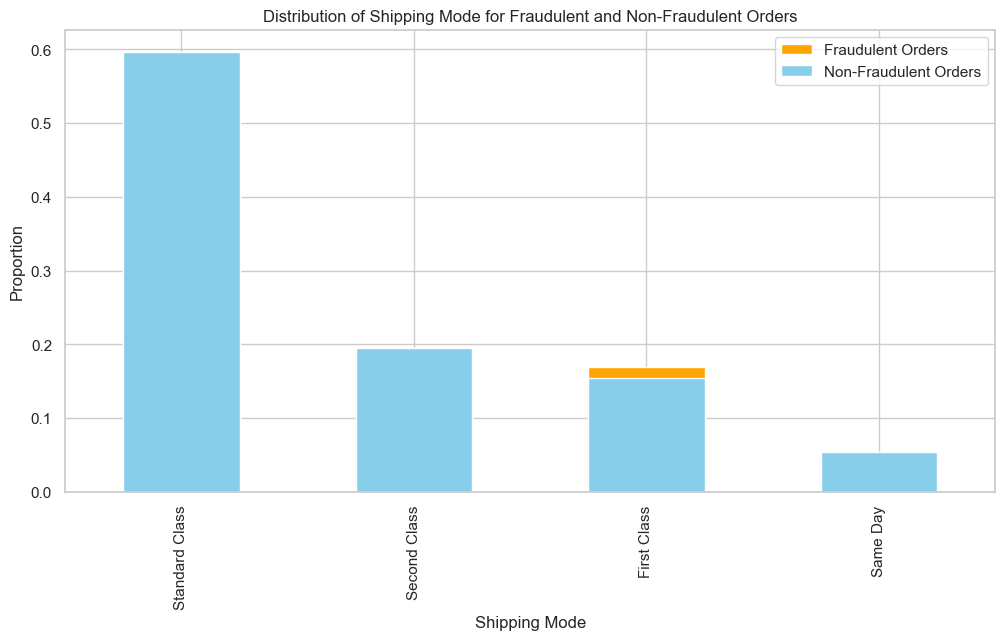

In [24]:
# Visualize the distribution of 'Shipping Mode' for suspected fraud and non-fraud orders
fraud_orders = supply_chain_df[supply_chain_df['Order Status'] == 'SUSPECTED_FRAUD']
non_fraud_orders = supply_chain_df[supply_chain_df['Order Status'] != 'SUSPECTED_FRAUD']
selected_feature = 'Shipping Mode'
fraud_distribution = fraud_orders[selected_feature].value_counts(normalize=True)
non_fraud_distribution = non_fraud_orders[selected_feature].value_counts(normalize=True)

# Plot 
fig, ax = plt.subplots(figsize=(12, 6))
fraud_distribution.plot(kind='bar', color='orange', label='Fraudulent Orders', ax=ax)
non_fraud_distribution.plot(kind='bar', color='skyblue', label='Non-Fraudulent Orders', ax=ax)
plt.title(f'Distribution of {selected_feature} for Fraudulent and Non-Fraudulent Orders')
plt.xlabel(selected_feature)
plt.ylabel('Proportion')
plt.legend()
plt.show()

# Sankey Flow of Unique Orders from Customer's Country to Delivery Regions

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
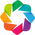

:Sankey   [Customer Country,Order Region]   (Count of Unique Orders)

In [29]:
import holoviews as hv
hv.extension("bokeh")

# Create a DataFrame with unique orders
supply_chain_df_unique_orders = supply_chain_df.drop_duplicates(subset=['Order Id'])
supply_chain_df_unique_orders_flow = supply_chain_df_unique_orders.groupby(["Customer Country", "Order Region"])['Order Id'].count().reset_index()
supply_chain_df_unique_orders_flow.columns = ["Customer Country", "Order Region", "Count of Unique Orders"]

# Generate a Sankey diagram with pastel colors
sankey_diagram = hv.Sankey(supply_chain_df_unique_orders_flow)

# Customize Sankey diagram appearance with pastel colors
sankey_diagram.opts(
    cmap='set1', edge_color='Customer Country', edge_line_width=0, node_alpha=0.5,
    node_width=40, width=800, height=700, bgcolor="snow",
    title="Sankey Flow of Orders from Customer's Country to Delivery Regions"
)

sankey_diagram

# Time Series Analysis

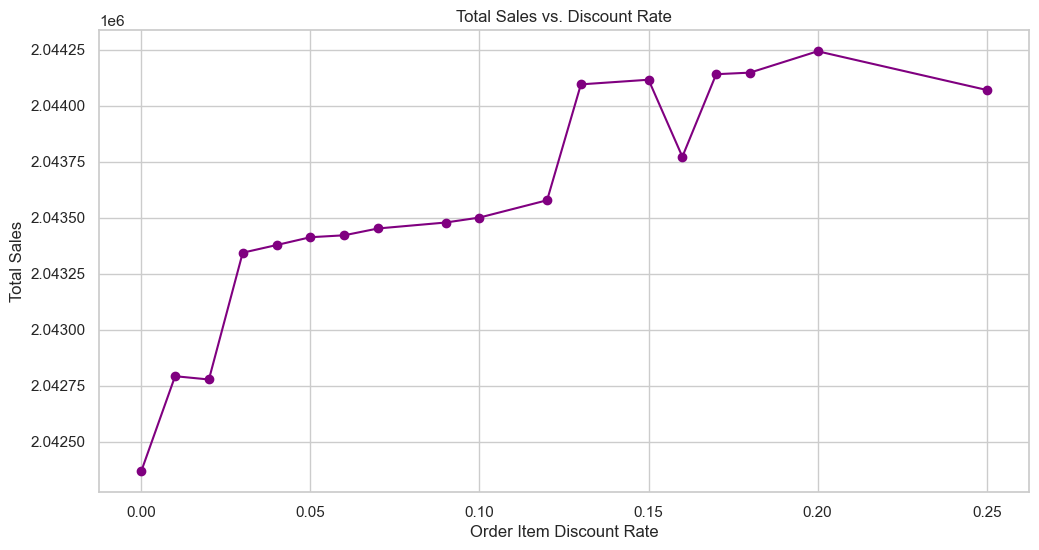

In [30]:
# Group by discount rates and calculate total sales for each discount rate
total_sales_by_discount = supply_chain_df.groupby('Order Item Discount Rate')['Sales'].sum().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(total_sales_by_discount['Order Item Discount Rate'], total_sales_by_discount['Sales'], marker='o', linestyle='-', color='purple')
plt.title('Total Sales vs. Discount Rate')
plt.xlabel('Order Item Discount Rate')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


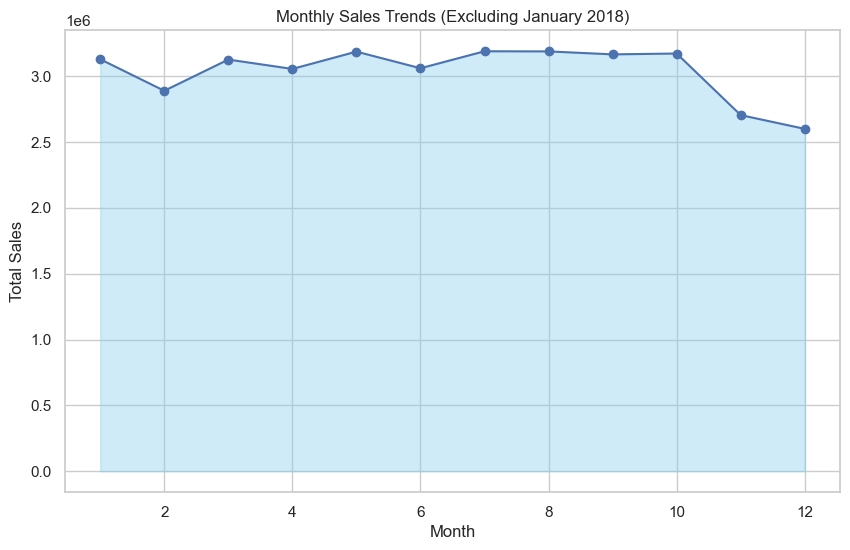

In [31]:
# Visualize monthly sales trends (excluding January 2018) with a shaded area for emphasis.
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
supply_chain_df['Month'] = supply_chain_df['order date (DateOrders)'].dt.month
filtered_data = supply_chain_df[supply_chain_df['order date (DateOrders)'].dt.year < 2018]

plt.figure(figsize=(10, 6))
plt.fill_between(filtered_data.groupby('Month')['Sales'].sum().index,
                 filtered_data.groupby('Month')['Sales'].sum().values,
                 color='skyblue', alpha=0.4)
plt.plot(filtered_data.groupby('Month')['Sales'].sum().index,
         filtered_data.groupby('Month')['Sales'].sum().values,
         marker='o', linestyle='-', color='b')

plt.title('Monthly Sales Trends (Excluding January 2018)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


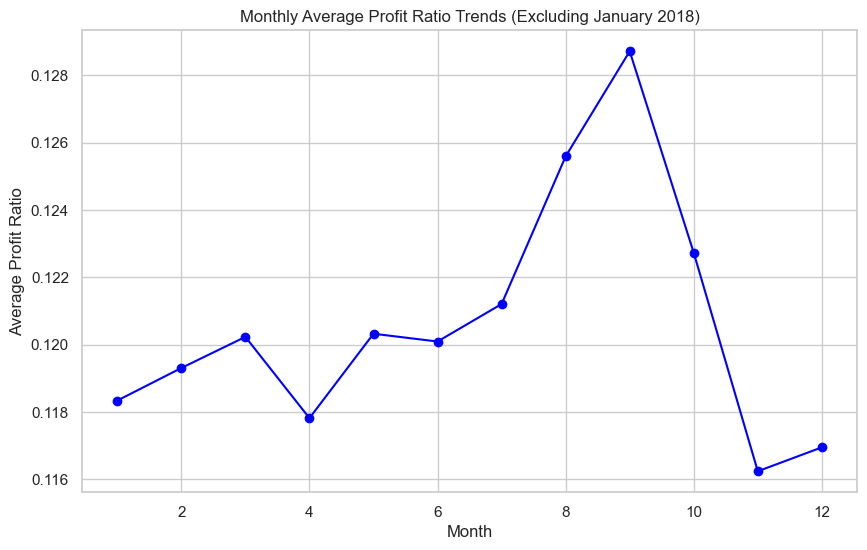

In [32]:
# Extract month and calculate monthly average profit ratio (excluding January 2018)
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
supply_chain_df['Month'] = supply_chain_df['order date (DateOrders)'].dt.month
filtered_data = supply_chain_df[supply_chain_df['order date (DateOrders)'].dt.year < 2018]
monthly_avg_profit_ratio = filtered_data.groupby('Month')['Order Item Profit Ratio'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_profit_ratio.index, monthly_avg_profit_ratio.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Average Profit Ratio Trends (Excluding January 2018)')
plt.xlabel('Month')
plt.ylabel('Average Profit Ratio')
plt.grid(True)
plt.show()


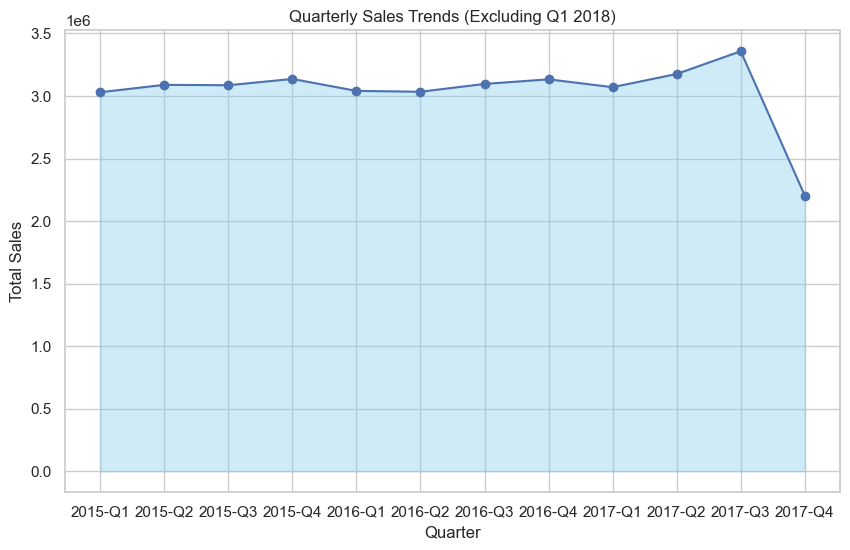

In [33]:
# Plot quarterly sales trends (excluding Q1 2018)
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
supply_chain_df['Quarter'] = supply_chain_df['order date (DateOrders)'].dt.to_period("Q")
filtered_data = supply_chain_df[supply_chain_df['order date (DateOrders)'].dt.year < 2018]
quarterly_sales = filtered_data.groupby('Quarter')['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.fill_between([f"{quarter.year}-Q{quarter.quarter}" for quarter in quarterly_sales.index],
                 quarterly_sales.values, color='skyblue', alpha=0.4)
plt.plot([f"{quarter.year}-Q{quarter.quarter}" for quarter in quarterly_sales.index],
         quarterly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Quarterly Sales Trends (Excluding Q1 2018)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


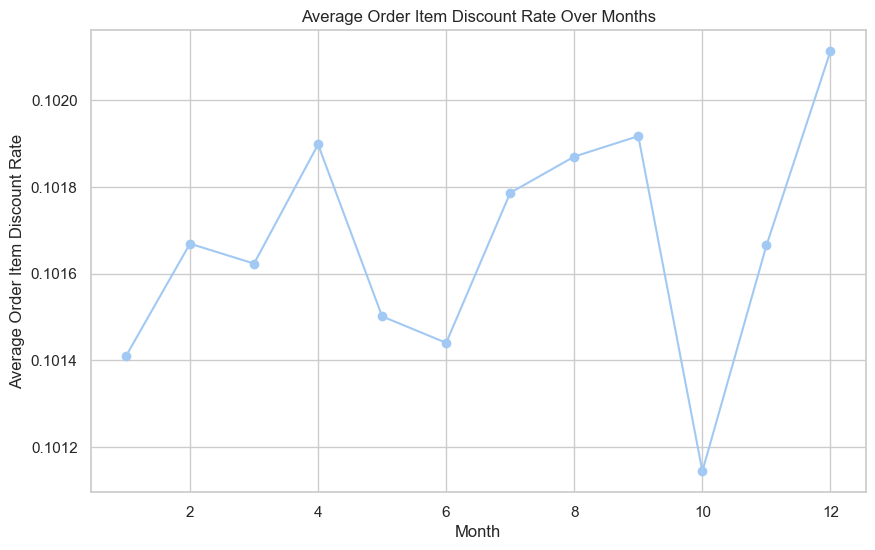

In [34]:
# Extract relevant columns and calculate the average order item discount rate over months
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
supply_chain_df['Month'] = supply_chain_df['order date (DateOrders)'].dt.month
monthly_discount_rate = supply_chain_df.groupby('Month')['Order Item Discount Rate'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_discount_rate.index, monthly_discount_rate.values, marker='o', linestyle='-')
plt.title('Average Order Item Discount Rate Over Months')
plt.xlabel('Month')
plt.ylabel('Average Order Item Discount Rate')
plt.grid(True)
plt.show()


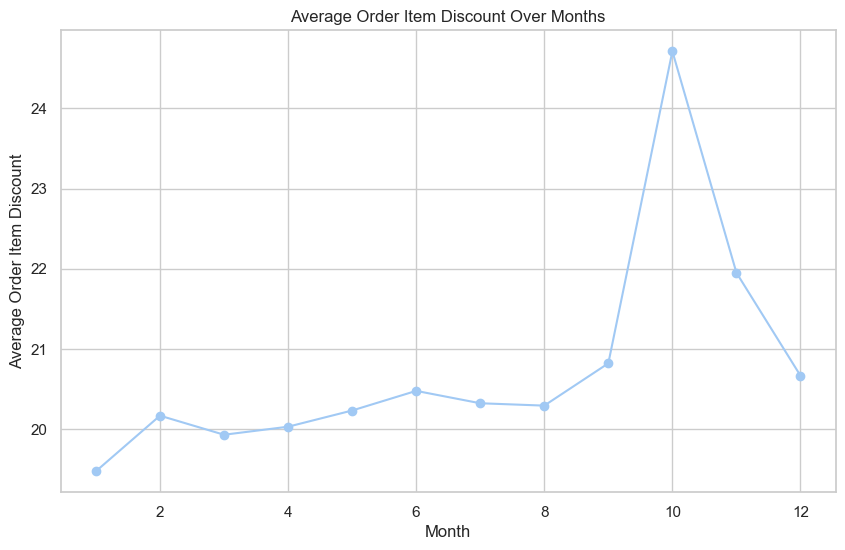

In [35]:
# Extract relevant columns and calculate the average order item discount over months
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
supply_chain_df['Month'] = supply_chain_df['order date (DateOrders)'].dt.month
monthly_discount = supply_chain_df.groupby('Month')['Order Item Discount'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_discount.index, monthly_discount.values, marker='o', linestyle='-')
plt.title('Average Order Item Discount Over Months')
plt.xlabel('Month')
plt.ylabel('Average Order Item Discount')
plt.grid(True)
plt.show()


# Profit Trends Analysis with Respect to Discount Rates

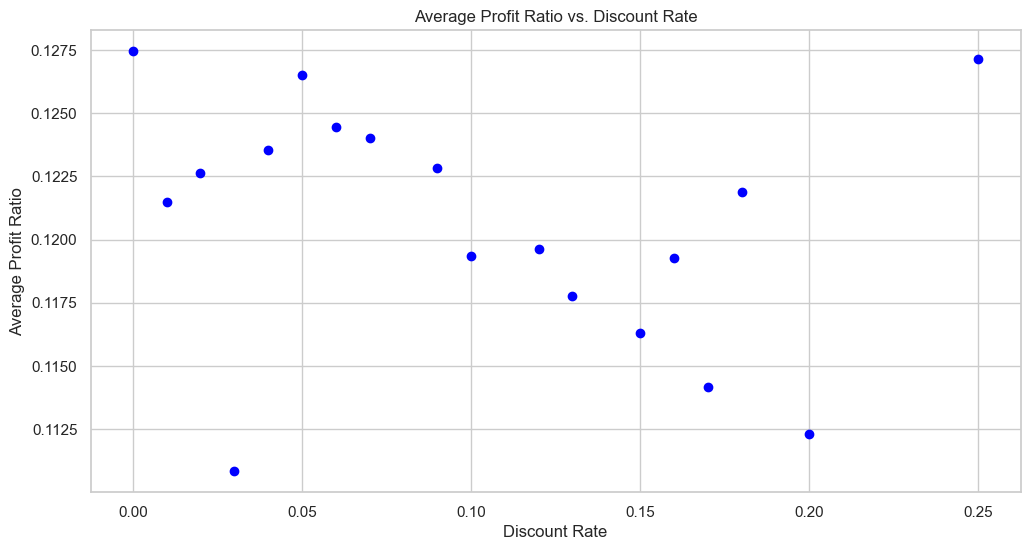

In [37]:
# Analyzing the relationship between average profit ratio and discount rates.
discount_profit_data = supply_chain_df[['Order Item Discount Rate', 'Order Item Profit Ratio']]
average_profit_ratio_by_discount = discount_profit_data.groupby('Order Item Discount Rate')['Order Item Profit Ratio'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(average_profit_ratio_by_discount['Order Item Discount Rate'], average_profit_ratio_by_discount['Order Item Profit Ratio'], color='blue')
plt.title('Average Profit Ratio vs. Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Average Profit Ratio')
plt.grid(True)
plt.show()


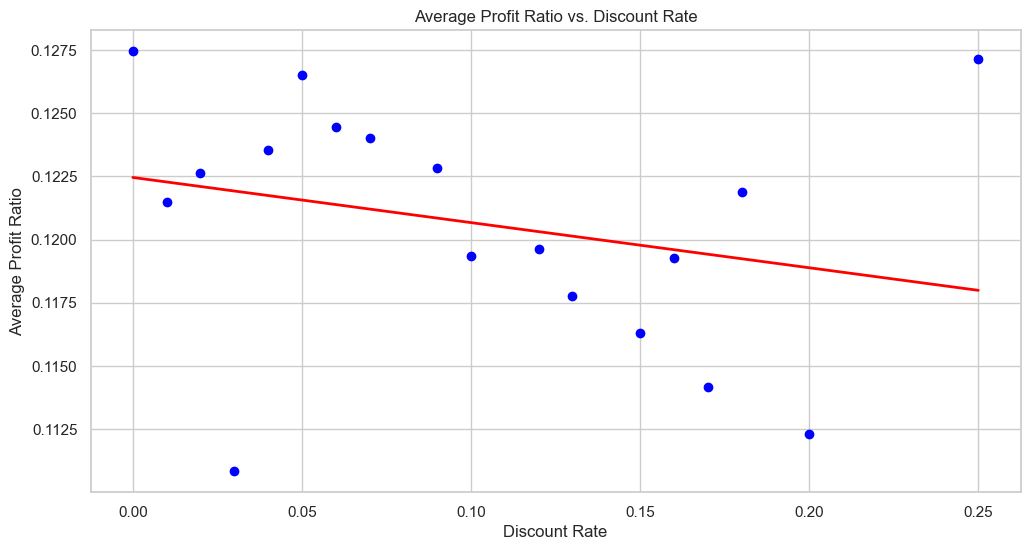

Coefficient (Slope): -0.02
Intercept: 0.12


In [39]:
from sklearn.linear_model import LinearRegression
# Performing linear regression analysis on the relationship between average profit ratio and discount rates.
X_ratio = average_profit_ratio_by_discount[['Order Item Discount Rate']]
y_ratio = average_profit_ratio_by_discount['Order Item Profit Ratio']
model_ratio = LinearRegression()
# Fit the linear regression model
model_ratio.fit(X_ratio, y_ratio)
# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(X_ratio, y_ratio, color='blue')
plt.plot(X_ratio, model_ratio.predict(X_ratio), color='red', linewidth=2)
plt.title('Average Profit Ratio vs. Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Average Profit Ratio')
plt.grid(True)
plt.show()
# Display the regression coefficients
print(f'Coefficient (Slope): {model_ratio.coef_[0]:.2f}')
print(f'Intercept: {model_ratio.intercept_:.2f}')

The coefficient (slope) of approximately -0.02 indicates a negative relationship, suggesting that as the discount rate increases, the average profit ratio tends to decrease by 0.02. The intercept of 0.12 represents the estimated average profit ratio when the discount rate is zero.

# Analyzing Impact of Discounts on Sales, Profit Ratio, and Identifying Least Sold Products
plt.show()


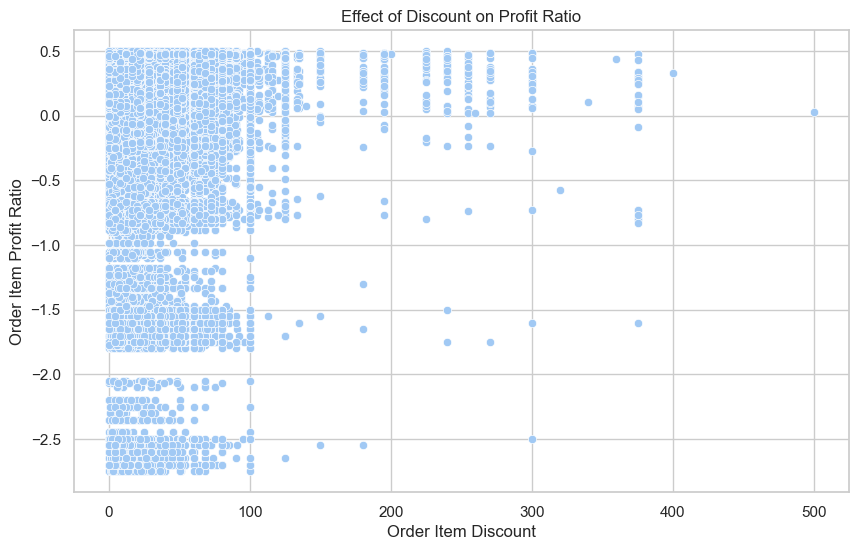

In [40]:
# Analyzing the impact of Order Item Discount on Order Item Profit Ratio.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Discount', y='Order Item Profit Ratio', data=supply_chain_df)
plt.title('Effect of Discount on Profit Ratio')
plt.xlabel('Order Item Discount')
plt.ylabel('Order Item Profit Ratio')
plt.show()

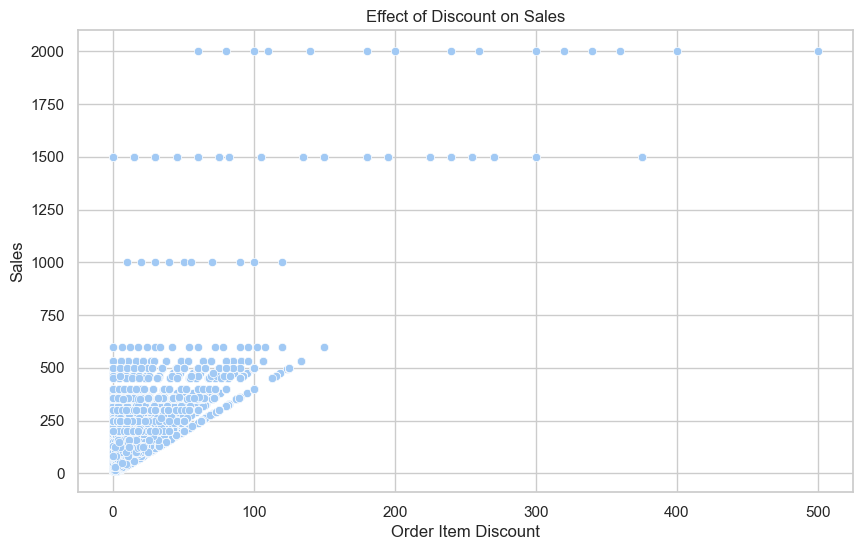

Correlation between Order Item Discount and Sales: 0.6174345043454071


In [41]:
# Calculating and visualizing the correlation between Order Item Discount and Sales.
correlation_discount_sales = supply_chain_df['Order Item Discount'].corr(supply_chain_df['Sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Discount', y='Sales', data=supply_chain_df)
plt.title('Effect of Discount on Sales')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales')
plt.show()
print(f"Correlation between Order Item Discount and Sales: {correlation_discount_sales}")

In [42]:
# Identifying the top 5 items with the highest average discounts.
discounted_items = supply_chain_df[supply_chain_df['Order Item Discount'] > 0]
average_discounts_by_product = discounted_items.groupby('Product Name')['Order Item Discount'].mean()
top_discounted_items = average_discounts_by_product.nlargest(5)
print("Top 5 Items with Highest Average Discounts:")
print(top_discounted_items)

Top 5 Items with Highest Average Discounts:
Product Name
SOLE E35 Elliptical                  239.333333
Dell Laptop                          162.122302
Bowflex SelectTech 1090 Dumbbells    103.500000
SOLE E25 Elliptical                   58.500000
Lawn mower                            56.900480
Name: Order Item Discount, dtype: float64


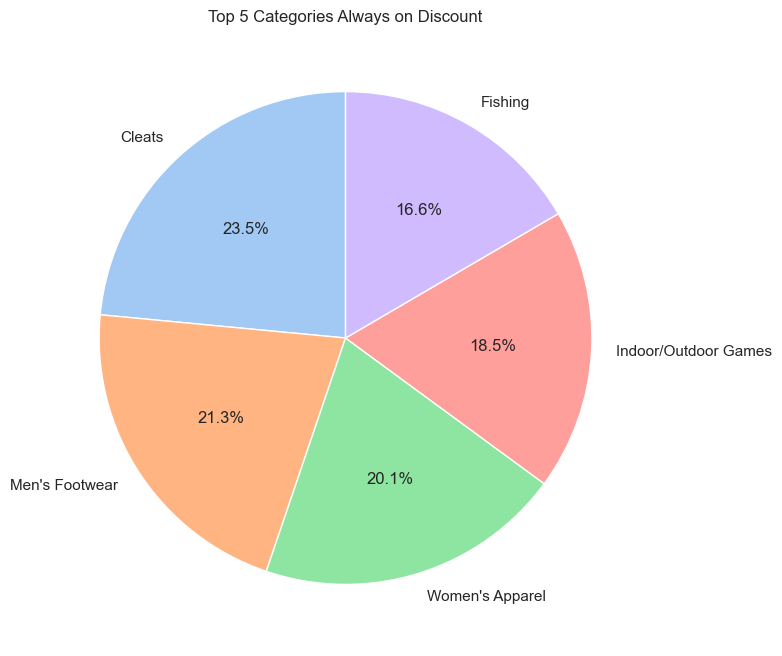

In [43]:
# Filtering items with discounts and identifying categories that are always on discount.
discounted_items = supply_chain_df[supply_chain_df['Order Item Discount'] > 0]
always_discounted_categories = discounted_items.groupby('Category Name')['Product Name'].count()
top_discounted_categories = always_discounted_categories.nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_discounted_categories, labels=top_discounted_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Categories Always on Discount')
plt.show()

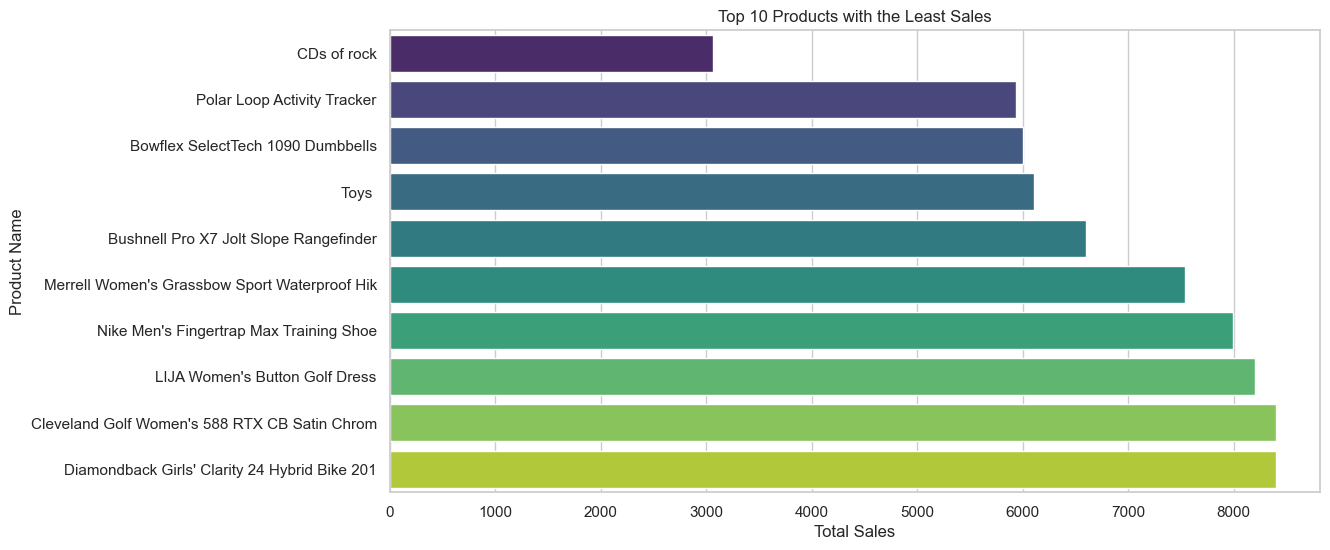

In [44]:
# Identifying the least sold products and exploring their relationship with discounts, sales, and regions.
least_sold_products = supply_chain_df.groupby('Product Name')['Sales'].sum().nsmallest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=least_sold_products.values, y=least_sold_products.index, palette='viridis')
plt.title('Top 10 Products with the Least Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

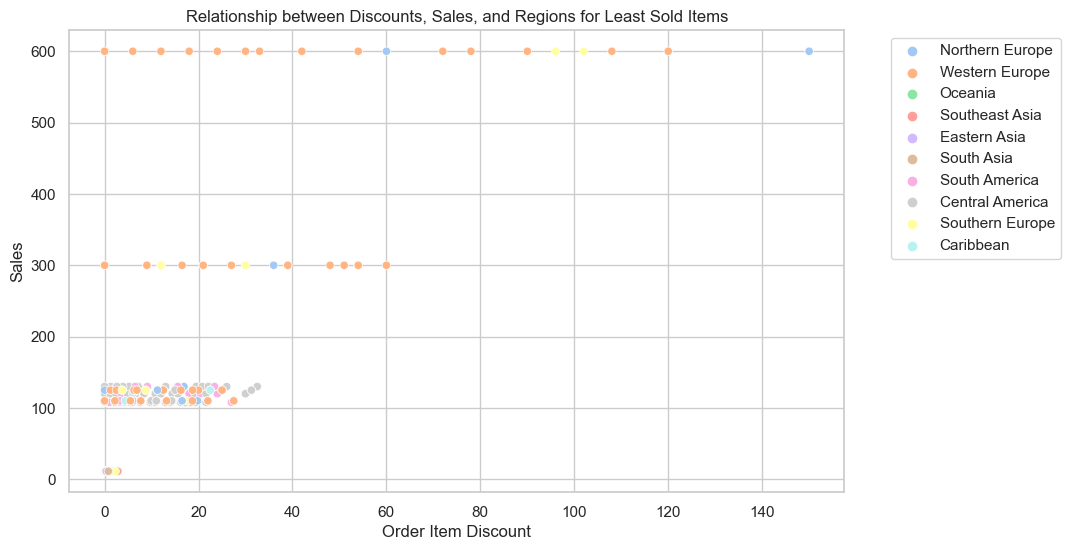

In [46]:
# Filtering for items related to the least sold products
least_sold_items = supply_chain_df[supply_chain_df['Product Name'].isin(least_sold_products.index)]

# Exploring the relationship between discounts, sales, and regions for the least sold items
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Item Discount', y='Sales', hue='Order Region', data=least_sold_items)
plt.title('Relationship between Discounts, Sales, and Regions for Least Sold Items')
plt.xlabel('Order Item Discount')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Basket Sizes in Orders

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


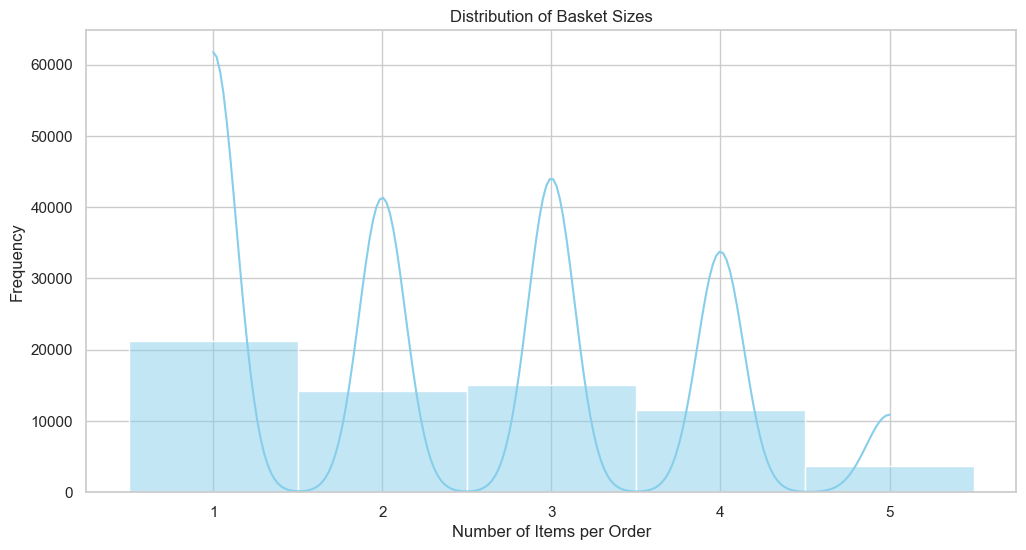

In [47]:
# Create a binary matrix indicating whether each product was present in each order
basket = pd.get_dummies(supply_chain_df['Product Name']).groupby(supply_chain_df['Order Id']).max()
basket_size = basket.sum(axis=1)
plt.figure(figsize=(12, 6))
sns.histplot(basket_size, bins=range(1, max(basket_size) + 2), kde=True, color='skyblue', discrete=True)
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.show()


# Customer Segmentation based on Recency, Frequency, and Monetary Values (RFM Analysis)


#### Loyal Customers:
Consistently high-frequency and high spending.

#### New Customers:
Recently acquired with low recency and frequency.

#### High-Value Customers:
High monetary value, regardless of recency or frequency.

#### Churning Customers:
High recency, indicating a long time since last purchase.

#### Discount Shoppers:
Moderate frequency and lower total spending, attracted by discounts.

#### Regular Customers:
General category for customers with average purchasing behavior.

In [48]:
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'])
end_date = pd.to_datetime('2018-01-31') #end date of orders

# Calculate Recency, Frequency, and Monetary values
supply_chain_df['Recency'] = (end_date - supply_chain_df.groupby('Customer Id')['order date (DateOrders)'].transform('max')).dt.days
supply_chain_df['Frequency'] = supply_chain_df.groupby('Customer Id')['Order Id'].transform('nunique')
supply_chain_df['Monetary'] = supply_chain_df.groupby('Customer Id')['Sales'].transform('sum')

# Define a function to assign customer segments
def assign_segment(row):
    R, F, M = row['Recency'], row['Frequency'], row['Monetary']
    if F >= 10 and M >= 5000:
        return "Loyal Customers"
    elif R <= 90 and F == 1:
        return "New Customers"
    elif M >= 5000:
        return "High-Value Customers"
    elif R > 365:
        return "Churning Customers"
    elif F >= 5 and M <= 2000:
        return "Discount Shoppers"
    else:
        return "Regular Customers"  
supply_chain_df['Customer_Segment'] = supply_chain_df.apply(assign_segment, axis=1)

print(supply_chain_df[['Customer Id', 'order date (DateOrders)', 'Sales', 'Customer_Segment']].head())


   Customer Id order date (DateOrders)   Sales Customer_Segment
0        20755     2018-01-31 22:56:00  327.75    New Customers
1        19492     2018-01-13 12:27:00  327.75    New Customers
2        19491     2018-01-13 12:06:00  327.75    New Customers
3        19490     2018-01-13 11:45:00  327.75    New Customers
4        19489     2018-01-13 11:24:00  327.75    New Customers


In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Customer_Segment', data=supply_chain_df, palette='pastel')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=90) 

# Display the number of customers on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
segment_counts_supply_chain = supply_chain_df['Customer_Segment'].value_counts()
pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(segment_counts_supply_chain, labels=segment_counts_supply_chain.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Customer Segmentation Distribution')
plt.legend(segment_counts_supply_chain.index, title='Customer Segments', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()